In [3]:
# import liabaries
#!pip install rioxarray -q
import rioxarray as rxr
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1
### Import the 1km grids (.gpkg) file from drive   
The original grid file from QGIS, the grid contains the geometry and crs

In [4]:
# read 1km grid file from local  
# grid_1km = gpd.read_file('/content/drive/MyDrive/birds/birds/project1/1km_hexagon.gpkg')

# grid_1km = gpd.read_file('/home/ztang/canterbury_birds/GIS_file/statsnz-new-zealand-grid-1-kilometre-2023-SHP.zip')

# alternative way to read 1km hexagon file from local
region = gpd.read_file('GIS_file/statsnz-regional-council-2023-clipped-generalised-SHP.zip')
region



,REGC2023_V,REGC2023_1,REGC2023_2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,01,Northland Region,Northland Region,12507.139052,12519.486872,3.315596e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Auckland Region,Auckland Region,4941.164248,4942.230520,2.894126e+06,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
2,03,Waikato Region,Waikato Region,23900.953428,24579.407274,2.193387e+06,"MULTIPOLYGON (((1763422.191 5781168.753, 17634..."
3,04,Bay of Plenty Region,Bay of Plenty Region,12071.549623,12281.370005,1.422856e+06,"MULTIPOLYGON (((1962972.136 5784007.406, 19629..."
4,05,Gisborne Region,Gisborne Region,8385.064982,8385.064982,6.957039e+05,"MULTIPOLYGON (((2039162.01 5703724.401, 203919..."
5,06,Hawke's Bay Region,Hawke's Bay Region,14139.051332,14190.848633,9.534995e+05,"MULTIPOLYGON (((1941251.295 5580353.81, 194124..."
6,07,Taranaki Region,Taranaki Region,7254.501680,7254.501680,5.344678e+05,"MULTIPOLYGON (((1687622.432 5675977.675, 16876..."
7,08,Manawatū-Whanganui Region,Manawatu-Whanganui Region,22220.638989,22220.638989,1.118034e+06,"POLYGON ((1821624.069 5738734.422, 1823326.936..."
8,09,Wellington Region,Wellington Region,8049.474240,8119.562231,6.795740e+05,"MULTIPOLYGON (((1748467.58 5420994.674, 174845..."
9,12,West Coast Region,West Coast Region,23245.518393,23321.164320,1.726195e+06,"MULTIPOLYGON (((1268984.122 5135203.798, 12689..."


In [5]:
# filter the region of canterbury region
canterbury_region = region[region['REGC2023_1'] == 'Canterbury Region']

In [6]:
canterbury_region

,REGC2023_V,REGC2023_1,REGC2023_2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
10,13,Canterbury Region,Canterbury Region,44503.596192,45207.475814,1.860630e+06,"MULTIPOLYGON (((1586267.292 5166799.259, 15862..."


In [7]:
canterbury_region.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# read the grid_1km_canterbury file
grid_1km_canterbury = gpd.read_file('GIS_file/grid_1km_canterbury.shp')

In [10]:
grid_1km_canterbury.head()

,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry
0,1395500.0,5004500.0,E13955N50045,4000.0,"POLYGON ((1395000 5005000, 1395673.839 5005000..."
1,1397500.0,5005500.0,E13975N50055,4000.0,"POLYGON ((1397000 5006000, 1398000 5006000, 13..."
2,1398500.0,5005500.0,E13985N50055,4000.0,"POLYGON ((1398000 5006000, 1398315.176 5006000..."
3,1396500.0,5005500.0,E13965N50055,4000.0,"POLYGON ((1396000 5006000, 1397000 5006000, 13..."
4,1399500.0,5006500.0,E13995N50065,4000.0,"POLYGON ((1399000 5007000, 1399248.641 5007000..."


view grids

In [11]:
grid_1km_canterbury.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [67]:
# set grid_1km crs to epsg:2193
# grid_1km_canterbury.crs = "EPSG:2193"

In [12]:
grid_1km_canterbury.head()

,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry
0,1395500.0,5004500.0,E13955N50045,4000.0,"POLYGON ((1395000 5005000, 1395673.839 5005000..."
1,1397500.0,5005500.0,E13975N50055,4000.0,"POLYGON ((1397000 5006000, 1398000 5006000, 13..."
2,1398500.0,5005500.0,E13985N50055,4000.0,"POLYGON ((1398000 5006000, 1398315.176 5006000..."
3,1396500.0,5005500.0,E13965N50055,4000.0,"POLYGON ((1396000 5006000, 1397000 5006000, 13..."
4,1399500.0,5006500.0,E13995N50065,4000.0,"POLYGON ((1399000 5007000, 1399248.641 5007000..."


### Step 2
Import the cbirds_filtered.csv, the df has been modified. the original data is ebrids distirbution dataset 2023 from ebirds

In [17]:
# read shapely file
# canterbury bird`s` distribution
import geopandas as gpd
cbirds = pd.read_csv('GIS_file/cbirds_filtered.csv')

In [70]:
cbirds.head()

,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,...,ATLAS BLOCK,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,APPROVED,Migration_type
0,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,NaN,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023/01/12,11:41:00,1.0,N
1,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,blkCI59,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023/01/12,13:16:00,1.0,N
2,2023/12/11,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,blkCL57,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023/01/21,11:59:00,1.0,N
3,2023/01/18,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,blkCL56,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023/01/18,11:02:00,1.0,N
4,2023/10/17,7167.0,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,NaN,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023/01/15,12:05:00,1.0,N


In [71]:
cbirds.columns

Index(['LAST EDITED DATE', 'TAXONOMIC ORDER', 'CATEGORY', 'COMMON NAME',
       'SCIENTIFIC NAME', 'EXOTIC CODE', 'OBSERVATION COUNT', 'BREEDING CODE',
       'BREEDING CATEGORY', 'BEHAVIOR CODE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID',
       'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'APPROVED', 'Migration_type'],
      dtype='object')

In [72]:
cbirds.dtypes

LAST EDITED DATE              object
TAXONOMIC ORDER              float64
CATEGORY                      object
COMMON NAME                   object
SCIENTIFIC NAME               object
EXOTIC CODE                   object
OBSERVATION COUNT             object
BREEDING CODE                 object
BREEDING CATEGORY             object
BEHAVIOR CODE                 object
STATE CODE                    object
COUNTY                        object
COUNTY CODE                   object
IBA CODE                      object
ATLAS BLOCK                   object
LOCALITY                      object
LOCALITY ID                   object
LOCALITY TYPE                 object
LATITUDE                     float64
LONGITUDE                    float64
OBSERVATION DATE              object
TIME OBSERVATIONS STARTED     object
APPROVED                     float64
Migration_type                object
dtype: object

In [20]:
# convert the columns to lower case and replace space with underscore
cbirds.columns = cbirds.columns.str.lower().str.replace(' ', '_')
cbirds.head()

,last_edited_date,taxonomic_order,category,common_name,scientific_name,exotic_code,observation_count,breeding_code,breeding_category,behavior_code,...,atlas_block,locality,locality_id,locality_type,latitude,longitude,observation_date,time_observations_started,approved,migration_type
0,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,NaN,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023/01/12,11:41:00,1.0,N
1,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,blkCI59,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023/01/12,13:16:00,1.0,N
2,2023/12/11,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,blkCL57,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023/01/21,11:59:00,1.0,N
3,2023/01/18,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,blkCL56,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023/01/18,11:02:00,1.0,N
4,2023/10/17,7167.0,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,NaN,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023/01/15,12:05:00,1.0,N


In [21]:
# convert the Latitude and Longitude to float
cbirds['latitude'] = cbirds['latitude'].astype(float)
cbirds['longitude'] = cbirds['longitude'].astype(float)

In [75]:
#cbirds.dtypes

In [22]:
# read the geometrey cols and set the crs
cbirds_gdf = gpd.GeoDataFrame(cbirds, geometry=gpd.points_from_xy(cbirds.longitude,cbirds.latitude),crs="EPSG:4326")

In [77]:
cbirds_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
cbirds_gdf.to_crs(epsg=2193, inplace=True)

In [24]:
cbirds_gdf.head()

,last_edited_date,taxonomic_order,category,common_name,scientific_name,exotic_code,observation_count,breeding_code,breeding_category,behavior_code,...,locality,locality_id,locality_type,latitude,longitude,observation_date,time_observations_started,approved,migration_type,geometry
0,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,1,NaN,NaN,NaN,...,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",L22166918,P,-42.458124,173.554744,2023/01/12,11:41:00,1.0,N,POINT (1645611.636 5299207.695)
1,2023/01/11,6851.0,spuh,albatross sp.,Diomedeidae sp.,NaN,4,NaN,NaN,NaN,...,"North of Clarence River Mouth, Kaikōura NZ-Can...",L22168688,P,-42.171416,173.932336,2023/01/12,13:16:00,1.0,N,POINT (1677006.617 5330770.721)
2,2023/12/11,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,Kaikoura--town waterfront,L1249759,H,-42.402038,173.682518,2023/01/21,11:59:00,1.0,N,POINT (1656167.445 5305358.826)
3,2023/01/18,7167.0,species,Australasian Gannet,Morus serrator,NaN,1,NaN,NaN,NaN,...,"1200 Alpine Pacific Touring Route, Peketā, Can...",L22249885,P,-42.451887,173.568536,2023/01/18,11:02:00,1.0,N,POINT (1646750.255 5299892.769)
4,2023/10/17,7167.0,species,Australasian Gannet,Morus serrator,NaN,2,NaN,NaN,NaN,...,Kaikoura South Coast--Oaro River Mouth,L12602431,H,-42.513964,173.507146,2023/01/15,12:05:00,1.0,N,POINT (1641660.959 5293031.744)


### STEP 3
Reset the cols type

In [25]:
# convert migration_type into categorical type
cbirds_gdf['migration_type'] = cbirds_gdf['migration_type'].astype('category')

#### Reset oberservation col to int
ps: there is 'X' contain the oberservation count, regarding to the ebird data description, X means unable to identify the number of birds BUT INDICATE PRESENCE. therefore, we can set the X into 1 

In [26]:
# set x into 1 and convert oberservation col to int type
cbirds_gdf.loc[cbirds_gdf['observation_count'] == 'X', 'observation_count'] = 1
cbirds_gdf['observation_count'] = cbirds_gdf['observation_count'].astype('int64')

In [27]:
# list the number of birds in each migration type
cbirds_gdf.groupby('migration_type')['observation_count'].sum()

/var/folders/sb/fx7gkfvd347dl53rhgbljz_80000gp/T/ipykernel_25258/2436635041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cbirds_gdf.groupby('migration_type')['observation_count'].sum()


migration_type
M     13880
N    856406
Name: observation_count, dtype: int64

In [28]:
cbirds_gdf.columns

Index(['last_edited_date', 'taxonomic_order', 'category', 'common_name',
       'scientific_name', 'exotic_code', 'observation_count', 'breeding_code',
       'breeding_category', 'behavior_code', 'state_code', 'county',
       'county_code', 'iba_code', 'atlas_block', 'locality', 'locality_id',
       'locality_type', 'latitude', 'longitude', 'observation_date',
       'time_observations_started', 'approved', 'migration_type', 'geometry'],
      dtype='object')

In [29]:
# select useful columns from cbirds_gdf
cbirds_gdf_new = cbirds_gdf[['last_edited_date','common_name','locality','migration_type','observation_count','geometry']]

cbirds_gdf_new.head()

,last_edited_date,common_name,locality,migration_type,observation_count,geometry
0,2023/01/11,albatross sp.,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",N,1,POINT (1645611.636 5299207.695)
1,2023/01/11,albatross sp.,"North of Clarence River Mouth, Kaikōura NZ-Can...",N,4,POINT (1677006.617 5330770.721)
2,2023/12/11,Australasian Gannet,Kaikoura--town waterfront,N,1,POINT (1656167.445 5305358.826)
3,2023/01/18,Australasian Gannet,"1200 Alpine Pacific Touring Route, Peketā, Can...",N,1,POINT (1646750.255 5299892.769)
4,2023/10/17,Australasian Gannet,Kaikoura South Coast--Oaro River Mouth,N,2,POINT (1641660.959 5293031.744)


In [30]:
cbirds_gdf_new.dtypes

last_edited_date       object
common_name            object
locality               object
migration_type       category
observation_count       int64
geometry             geometry
dtype: object

In [31]:
# convert observation_date to time format 
cbirds_gdf_new['last_edited_date'] = pd.to_datetime(cbirds_gdf_new['last_edited_date'])
cbirds_gdf_new.head()

/opt/anaconda3/envs/new_env_yml/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,last_edited_date,common_name,locality,migration_type,observation_count,geometry
0,2023-01-11,albatross sp.,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",N,1,POINT (1645611.636 5299207.695)
1,2023-01-11,albatross sp.,"North of Clarence River Mouth, Kaikōura NZ-Can...",N,4,POINT (1677006.617 5330770.721)
2,2023-12-11,Australasian Gannet,Kaikoura--town waterfront,N,1,POINT (1656167.445 5305358.826)
3,2023-01-18,Australasian Gannet,"1200 Alpine Pacific Touring Route, Peketā, Can...",N,1,POINT (1646750.255 5299892.769)
4,2023-10-17,Australasian Gannet,Kaikoura South Coast--Oaro River Mouth,N,2,POINT (1641660.959 5293031.744)


#### STEP 4
apply sptial join with grid_1km

In [32]:
grid_1km_canterbury.crs == cbirds_gdf.crs

True

In [33]:
grid_1km_canterbury.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46248 entries, 0 to 46247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CENTROID_X  46248 non-null  float64 
 1   CENTROID_Y  46248 non-null  float64 
 2   GridID      46248 non-null  object  
 3   Shape_Leng  46248 non-null  float64 
 4   geometry    46248 non-null  geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.8+ MB


In [91]:
# grid_1km.geometry = grid_1km.geometry.to_crs(epsg=2193)


In [34]:
# drop the geometry column
#grid_1km_canterbury.drop(columns=['CENTROID_X', 'CENTROID_Y', 'Shape_Leng'], inplace=True)
grid_1km_canterbury.head()

,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry
0,1395500.0,5004500.0,E13955N50045,4000.0,"POLYGON ((1395000 5005000, 1395673.839 5005000..."
1,1397500.0,5005500.0,E13975N50055,4000.0,"POLYGON ((1397000 5006000, 1398000 5006000, 13..."
2,1398500.0,5005500.0,E13985N50055,4000.0,"POLYGON ((1398000 5006000, 1398315.176 5006000..."
3,1396500.0,5005500.0,E13965N50055,4000.0,"POLYGON ((1396000 5006000, 1397000 5006000, 13..."
4,1399500.0,5006500.0,E13995N50065,4000.0,"POLYGON ((1399000 5007000, 1399248.641 5007000..."


In [35]:
#cbirds_gdf_new = cbirds_gdf_new.to_crs(2193)
cbirds_gdf_new.head()

,last_edited_date,common_name,locality,migration_type,observation_count,geometry
0,2023-01-11,albatross sp.,"Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...",N,1,POINT (1645611.636 5299207.695)
1,2023-01-11,albatross sp.,"North of Clarence River Mouth, Kaikōura NZ-Can...",N,4,POINT (1677006.617 5330770.721)
2,2023-12-11,Australasian Gannet,Kaikoura--town waterfront,N,1,POINT (1656167.445 5305358.826)
3,2023-01-18,Australasian Gannet,"1200 Alpine Pacific Touring Route, Peketā, Can...",N,1,POINT (1646750.255 5299892.769)
4,2023-10-17,Australasian Gannet,Kaikoura South Coast--Oaro River Mouth,N,2,POINT (1641660.959 5293031.744)


In [36]:
cbirds_gdf_new['month'] = cbirds_gdf_new['last_edited_date'].dt.month

/opt/anaconda3/envs/new_env_yml/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [37]:
cbirds_gdf_new.month.unique()

array([ 1, 12, 10,  3,  9,  2,  7, 11,  5,  8,  4,  6], dtype=int32)

In [96]:
print(cbirds_gdf_new.geometry.crs)
print(grid_1km_canterbury.geometry.crs)

EPSG:2193
EPSG:2193


In [38]:
# join the cbirds_gdf with grid_1km
cbirds_grid = gpd.sjoin(grid_1km_canterbury, cbirds_gdf_new,predicate='contains')
cbirds_grid.head()


,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry,index_right,last_edited_date,common_name,locality,migration_type,observation_count,month
242,1382500.0,5022500.0,E13825N50225,4000.0,"POLYGON ((1382000 5023000, 1383000 5023000, 13...",63830,2024-01-02,New Zealand Falcon,Buster Diggings Mount Buster,N,1,1
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20451,2024-07-12,Eurasian Blackbird,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20456,2024-07-12,Eurasian Blackbird,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20660,2024-07-12,Silvereye,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20647,2024-07-12,Paradise Shelduck,AN151,N,2,7


In [99]:
cbirds_grid['month'].unique()

array([ 1,  7,  2,  5,  4,  3,  8, 12,  9, 11,  6, 10], dtype=int32)

<Axes: xlabel='month'>

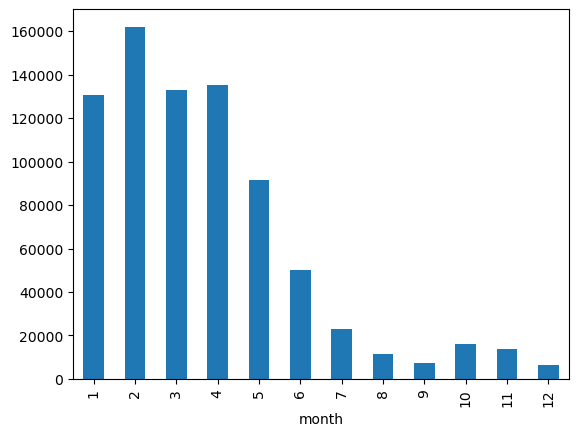

In [100]:
cbirds_grid.groupby('month')['observation_count'].sum().plot(kind='bar', color='blue')

In [102]:
cbirds_grid.head()

,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry,index_right,last_edited_date,common_name,locality,migration_type,observation_count,month
242,1382500.0,5022500.0,E13825N50225,4000.0,"POLYGON ((1382000 5023000, 1383000 5023000, 13...",63830,2024-01-02,New Zealand Falcon,Buster Diggings Mount Buster,N,1,1
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20725,2024-07-12,Yellowhammer,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20443,2024-07-12,Dunnock,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20723,2024-07-12,Yellowhammer,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20713,2024-07-12,Yellowhammer,AN151,N,1,7


In [103]:
# Use the .info() method to get the datatypes of each column in the GeoDataFrame
cbirds_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 70579 entries, 242 to 45874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CENTROID_X         70579 non-null  float64       
 1   CENTROID_Y         70579 non-null  float64       
 2   GridID             70579 non-null  object        
 3   Shape_Leng         70579 non-null  float64       
 4   geometry           70579 non-null  geometry      
 5   index_right        70579 non-null  int64         
 6   last_edited_date   70579 non-null  datetime64[ns]
 7   common_name        70579 non-null  object        
 8   locality           70579 non-null  object        
 9   migration_type     70579 non-null  category      
 10  observation_count  70579 non-null  int64         
 11  month              70579 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(3), geometry(1), int32(1), int64(2), object(3)
memory usage: 6.3+ MB

In [104]:
# # set X to nan in observatio col
# import numpy as np
# for index, row in oyster_grid.iterrows():
#     if row['OBSERVATIO'] == 'X':
#         oyster_grid.at[index, 'OBSERVATIO'] = np.nan

In [105]:
cbirds_grid.head()

,CENTROID_X,CENTROID_Y,GridID,Shape_Leng,geometry,index_right,last_edited_date,common_name,locality,migration_type,observation_count,month
242,1382500.0,5022500.0,E13825N50225,4000.0,"POLYGON ((1382000 5023000, 1383000 5023000, 13...",63830,2024-01-02,New Zealand Falcon,Buster Diggings Mount Buster,N,1,1
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20725,2024-07-12,Yellowhammer,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20443,2024-07-12,Dunnock,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20723,2024-07-12,Yellowhammer,AN151,N,1,7
693,1378500.0,5027500.0,E13785N50275,4000.0,"POLYGON ((1378000 5028000, 1379000 5028000, 13...",20713,2024-07-12,Yellowhammer,AN151,N,1,7


In [110]:
# Specify the output path for the shapefile
output_shapefile = '/content/drive/MyDrive/birds/birds/project1/canterbury_region.shp'

# Export the GeoDataFrame to a shapefile
canterbury_region.to_file(output_shapefile,driver='GeoJSON')

#### create buffer of canterbury_region

In [122]:
# Assuming canterbury_region is a GeoDataFrame with a valid geometry column

# Get the bounds of the geometry
bounds = canterbury_region.geometry.bounds

# Extract the left, right, bottom, and top values
left = bounds['minx'].min()
right = bounds['maxx'].max()
bottom = bounds['miny'].min()
top = bounds['maxy'].max()

# Print the results
print(f"Left: {left}")
print(f"Right: {right}")
print(f"Bottom: {bottom}")
print(f"Top: {top}")

Left: 1323813.1678
Right: 1688162.0909000002
Bottom: 5004764.9276
Top: 5360240.0554


In [ ]:
import geopandas as gpd

# Assuming chch_boundary is a GeoDataFrame with a valid geometry column

# Create a buffer of 1000 meters (1 kilometer)
canterbury_buffer = canterbury_region.buffer(1000)

# Get the bounds of the extended geometry
bounds = canterbury_buffer.bounds

# Extract the left, right, bottom, and top values
left = bounds['minx'].min()
right = bounds['maxx'].max()
bottom = bounds['miny'].min()
top = bounds['maxy'].max()

# Print the results
print(f"Left: {left}")
print(f"Right: {right}")
print(f"Bottom: {bottom}")
print(f"Top: {top}")

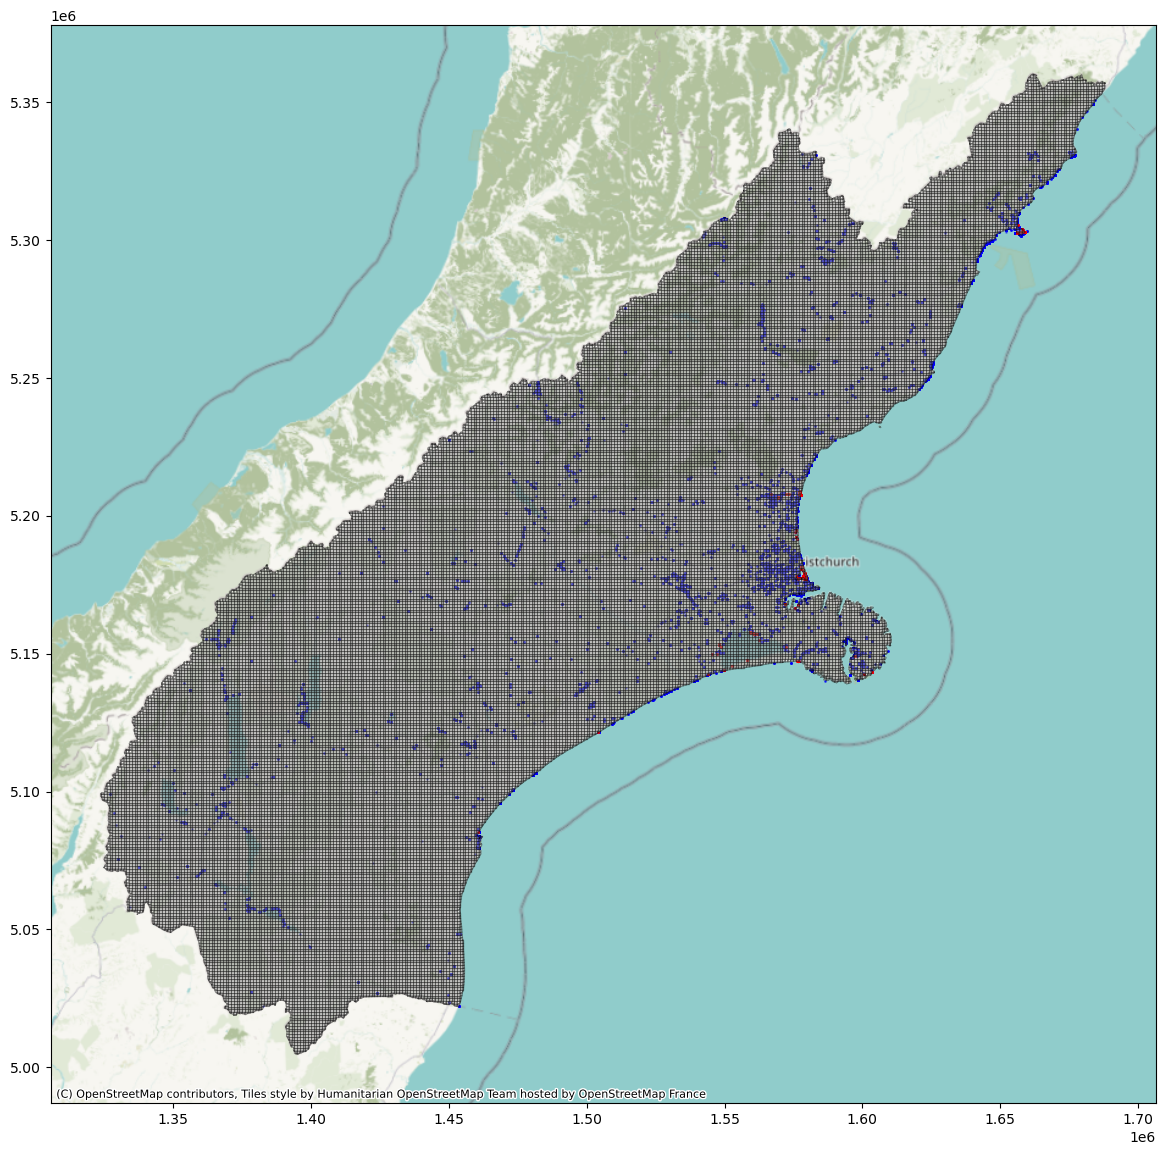

In [124]:
import matplotlib.pyplot as plt
import contextily as ctx

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,14))

# Plot the data from the "lim" dataset with blue color onto the specified axis
#chch_boundary.plot(color='lightgrey', ax=ax)

# plot the colunm of birds_gdf_new data that by migration_type
cbirds_gdf_new[cbirds_gdf_new['migration_type'] == 'N'].plot(ax=ax, color='blue',markersize = 0.6,alpha = 0.5)
cbirds_gdf_new[cbirds_gdf_new['migration_type'] == 'M'].plot(ax=ax, color='red',markersize = 1.4)

#cbirds_gdf_new.plot(ax=ax, color='red',markersize = 0.8)

grid_1km_canterbury.plot(ax=ax, legend=True, alpha = 0.4, facecolor='white', edgecolor='black')

# add base map
ctx.add_basemap(ax, crs=grid_1km_canterbury.crs)

# Display the final plot
plt.show()

In [125]:
# create cbirds_gdf_new data that by month == 2

cbirds_gdf_new_feb = cbirds_gdf_new[cbirds_gdf_new['month'] == 2]

/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


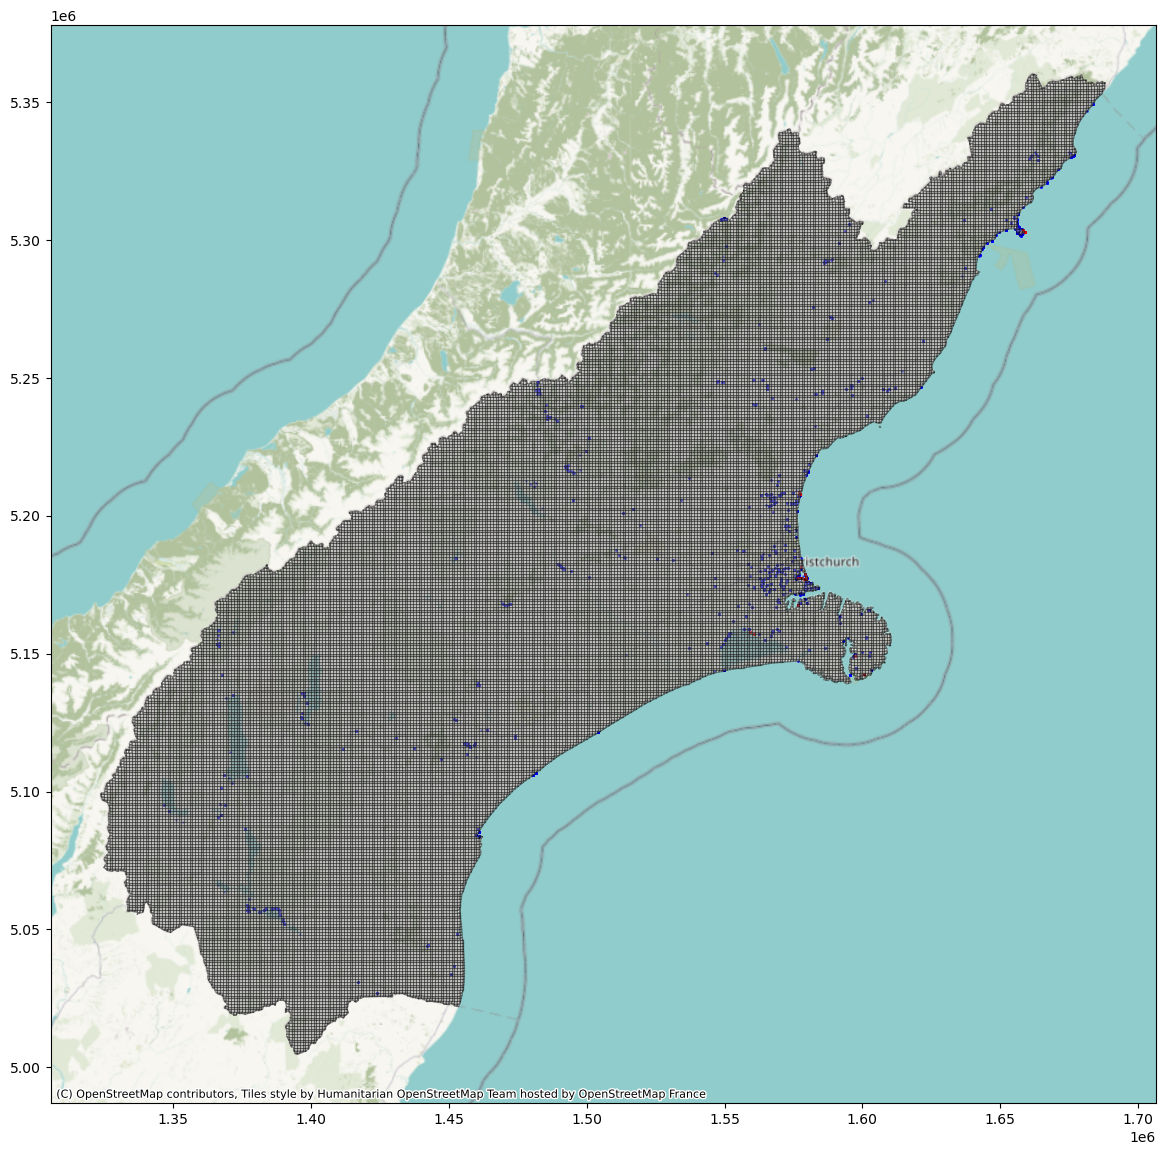

In [126]:
# plot the colunm of birds_gdf_new_feb data that by migration_type
# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,14))

# Plot the data from the "lim" dataset with blue color onto the specified axis
#chch_boundary.plot(color='lightgrey', ax=ax)

# plot the colunm of birds_gdf_new data that by migration_type
cbirds_gdf_new_feb[cbirds_gdf_new['migration_type'] == 'N'].plot(ax=ax, color='blue',markersize = 0.6,alpha = 0.5)
cbirds_gdf_new_feb[cbirds_gdf_new['migration_type'] == 'M'].plot(ax=ax, color='red',markersize = 1.4)

#cbirds_gdf_new.plot(ax=ax, color='red',markersize = 0.8)

grid_1km_canterbury.plot(ax=ax, legend=True, alpha = 0.4, facecolor='white', edgecolor='black')

# add base map
ctx.add_basemap(ax, crs=grid_1km_canterbury.crs)

# Display the final plot
plt.show()
